<a href="https://colab.research.google.com/github/Arnav613Gupta/ChattingApp/blob/main/Model_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

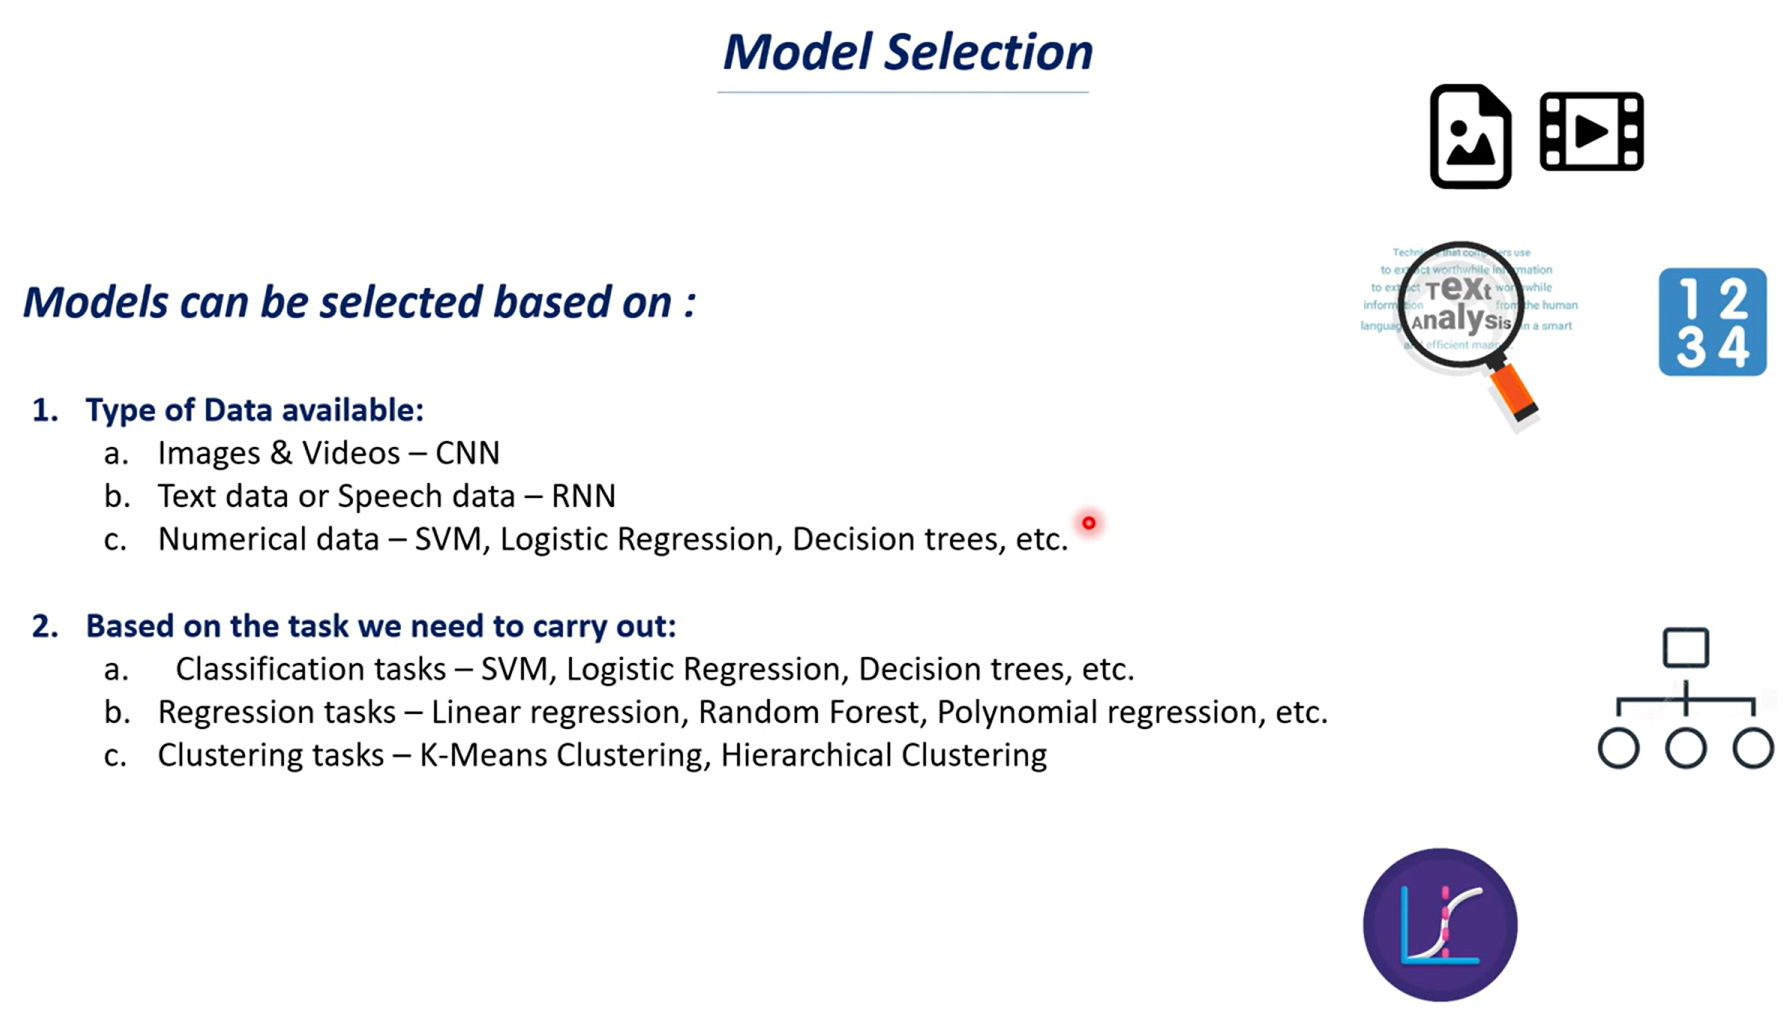

In [ ]:
# importing dependencies
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
#importing models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
heart_data = pd.read_csv("/content/drive/MyDrive/Databases /heart_data.csv")

In [ ]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart_data.shape

(303, 14)

In [ ]:
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
heart_data['target'].value_counts()

,count
target,
1,165
0,138


In [ ]:
#splitting features and target
X = heart_data.drop(columns = 'target', axis = 1)
Y = heart_data['target']

In [ ]:
X = np.asarray(X)
Y = np.asarray(Y)

#Model Selection

1. compare the models with default hyperparameter values using cross validation.

In [ ]:

models = [LogisticRegression(max_iter = 1000), SVC(kernel = "linear"), KNeighborsClassifier(), RandomForestClassifier(random_state = 0)]


In [ ]:
def compare_model_cross_val():
  for model in models:
    cv_score = cross_val_score(model, X, Y, cv= 5)
    mean_accuracy = sum(cv_score)/len(cv_score)
    mean_accuracy = mean_accuracy*100
    mean_accuracy = round(mean_accuracy, 2)
    print("Cross validation accuracies for the ", model, "=", cv_score)
    print("Accuracy Score of ", model ," is ", mean_accuracy, " %")



In [ ]:
compare_model_cross_val()

Cross validation accuracies for the  LogisticRegression(max_iter=1000) = [0.80327869 0.86885246 0.85245902 0.86666667 0.75      ]
Accuracy Score of  LogisticRegression(max_iter=1000)  is  82.83  %
Cross validation accuracies for the  SVC(kernel='linear') = [0.81967213 0.8852459  0.80327869 0.86666667 0.76666667]
Accuracy Score of  SVC(kernel='linear')  is  82.83  %
Cross validation accuracies for the  KNeighborsClassifier() = [0.60655738 0.6557377  0.57377049 0.73333333 0.65      ]
Accuracy Score of  KNeighborsClassifier()  is  64.39  %
Cross validation accuracies for the  RandomForestClassifier(random_state=0) = [0.85245902 0.90163934 0.81967213 0.81666667 0.8       ]
Accuracy Score of  RandomForestClassifier(random_state=0)  is  83.81  %


Inference: **RandomForestClassifier** has highest accuracy with defaut parameters

2. comparing model with different hyperparameters

In [ ]:

models_list = [LogisticRegression(max_iter = 10000), SVC(), KNeighborsClassifier(), RandomForestClassifier(random_state = 0)]


In [ ]:
#Creating dictionary of hyperparameter values
model_hyperparameters = {
    'log_reg_hyperparameters': {
        'C' : [1,5,10,20]
    },
    'svc':{
        'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
        'C' : [1,5,10,20]
    },
    'KNN_hyperparameters': {
        'n_neighbors' : [3,5,10]
    },
    'random_forest_hyperparameters':{
        "n_estimators" : [10,20,50,100],
        "max_depth" : [1,5,10]
    }

}

In [ ]:
model_keys = list(model_hyperparameters.keys())
print(model_keys)

['log_reg_hyperparameters', 'svc', 'KNN_hyperparameters', 'random_forest_hyperparameters']


In [ ]:
#Applying Grids

def ModelSelection(list_of_models, hyperparameters_dict):
  results = []

  i = 0

  for model in list_of_models:
    key = model_keys[i]
    params = model_hyperparameters[key]

    i+=1

    print(model)
    print(params)
    print("----------------------------")

    classifier = GridSearchCV(model, params, cv = 5)
    classifier.fit(X, Y)

    results.append({
        "model used" : model,
        "highest_score" : classifier.best_score_,
        "best hyperparameters" : classifier.best_params_
    })

  resultDataframe = pd.DataFrame(results, columns=["model used","highest_score","best hyperparameters"  ])

  return resultDataframe



In [ ]:
ModelSelection(models_list, model_hyperparameters )

LogisticRegression(max_iter=10000)
{'C': [1, 5, 10, 20]}
----------------------------
SVC()
{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}
----------------------------
KNeighborsClassifier()
{'n_neighbors': [3, 5, 10]}
----------------------------
RandomForestClassifier(random_state=0)
{'n_estimators': [10, 20, 50, 100], 'max_depth': [1, 5, 10]}
----------------------------


,model used,highest_score,best hyperparameters
0,LogisticRegression(max_iter=10000),0.831585,{'C': 5}
1,SVC(),0.828306,"{'C': 1, 'kernel': 'linear'}"
2,KNeighborsClassifier(),0.643880,{'n_neighbors': 5}
3,RandomForestClassifier(random_state=0),0.841311,"{'max_depth': 10, 'n_estimators': 20}"


Random Forest Classiefier with with max_depth': 10, 'n_estimators': 20 has highest accuracy.

---

